In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
import math
from numpy import mean, std, sqrt
#from pycaret.regression import *
import torch
import torch.nn as nn
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
time_start = datetime.now()

In [ ]:
## setting the start and end date
start_date = '2000-01-01'
end_date = datetime.today()

## Data Preprocessing

In [ ]:
# Define the currency pair symbol for GBP to BDT
currency_pair = 'GBPBDT=X'
# Fetch exchange rate data from Yahoo Finance
data = yf.download(currency_pair, start=start_date, end=end_date)
# Display the fetched data
print(data)

data = data.reset_index()

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951       0
2005-08-12  118.424652  119.007004  118.366302  118.837151  118.837151       0
2005-08-15  119.118050  119.219200  118.437103  118.508499  118.508499       0
2005-08-16  117.548950  117.955200  117.305496  117.646500  117.646500       0
2005-08-17  117.513199  118.373497  117.383499  118.061096  118.061096       0
...                ...         ...         ...         ...         ...     ...
2024-04-09  136.452621  137.149857  136.452621  136.448654  136.448654       0
2024-04-10  137.185089  137.185089  137.185089  137.149857  137.149857       0
2024-04-11  137.072632  137.072632  135.510818  137.185089  137.185089       0
2024-04-12  135.737656  135.737656  134.667725  135.510818  135.510818       0
2024-04-15  136.587006  137.447006  136.460007  136.

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4237,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.0
mean,2016-02-14 18:49:01.515223040,114.716268,114.921412,114.507068,114.695113,114.695113,0.0
min,2005-08-11 00:00:00,92.207001,92.207001,91.541000,91.512001,91.512001,0.0
25%,2012-02-07 00:00:00,107.419998,107.589996,107.160004,107.389999,107.389999,0.0
50%,2016-02-29 00:00:00,113.830002,114.029999,113.580002,113.810432,113.810432,0.0
75%,2020-03-24 00:00:00,121.459198,121.720001,121.080002,121.279999,121.279999,0.0
max,2024-04-15 00:00:00,140.264313,140.484711,140.166031,140.511795,140.511795,0.0
std,NaN,10.450062,10.441463,10.449025,10.433738,10.433738,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4237 non-null   datetime64[ns]
 1   Open       4237 non-null   float64       
 2   High       4237 non-null   float64       
 3   Low        4237 non-null   float64       
 4   Close      4237 non-null   float64       
 5   Adj Close  4237 non-null   float64       
 6   Volume     4237 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 231.8 KB


## Data Visualization

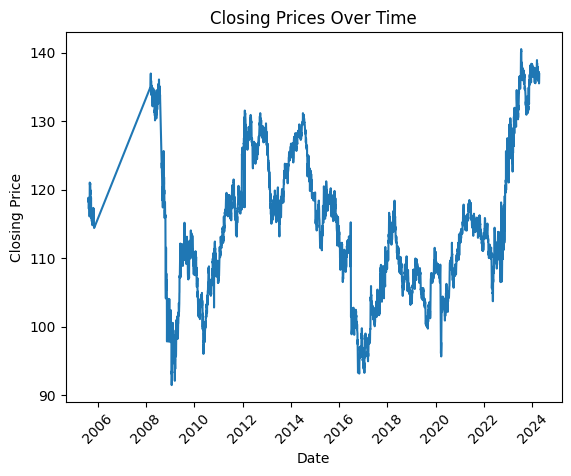

In [ ]:
# Plotting the closing prices
plt.plot(data['Date'] ,data['Close'])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('GBP to Bangtaka closing price')
plt.show()

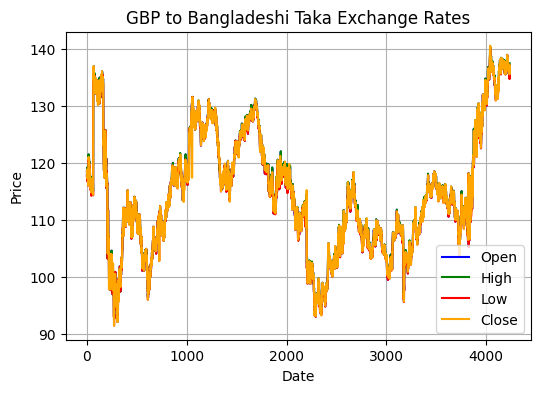

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Open'], label='Open', color='blue')
plt.plot(data.index, data['High'], label='High', color='green')
plt.plot(data.index, data['Low'], label='Low', color='red')
plt.plot(data.index, data['Close'], label='Close', color='orange')

plt.title('GBP to Bangladeshi Taka Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Splitting of data

In [ ]:
# Defining dataset for training, test and validation
feature_data_set = data

train_data_size = int(len(feature_data_set) * 0.80)  ## 80% dataset for training ##
test_data_size = int(len(feature_data_set) * 0.10)   ## 10% dataset for training ##
val_data_size = len(feature_data_set) - train_data_size - test_data_size  ## Validation dataset ##

# Split the data into training, testing, and validation sets
train_data = feature_data_set.iloc[:train_data_size]
validation_data = feature_data_set.iloc[train_data_size: train_data_size + test_data_size]
test_data = feature_data_set.iloc[train_data_size + val_data_size:]

# Print the shapes of the split sets
print(train_data.shape, validation_data.shape, test_data.shape)

(3389, 7) (423, 7) (423, 7)


In [ ]:
train_filter_data = train_data.filter(['Adj Close'])
train_data_set = train_filter_data.values

test__filter_data = test_data.filter(['Adj Close'])
test_data_set = test__filter_data.values

validation_filter_data = validation_data.filter(['Adj Close'])
validation_data_set = validation_filter_data.values

train_data_set.shape, test_data_set.shape, validation_data_set.shape

((3389, 1), (423, 1), (423, 1))

In [ ]:
## scaling of data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Scaled_train_data_set = scaler.fit_transform(train_data_set)
Scaled_val_data_set = scaler.fit_transform(validation_data_set)
Scaled_test_data_set = scaler.fit_transform(test_data_set)

In [ ]:
## data spliting into x and y train
X_train = []
y_train = []

step_index = 30

for index in range(len(train_data) - step_index):
    X_train.append(Scaled_train_data_set[index:index + step_index, 0])
    y_train.append(Scaled_train_data_set[step_index + index, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Convert to NumPy array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape the input data to match deep learning models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.reshape(y_train.shape[0],1)

# Print the reshaped data
print(X_train.shape , y_train.shape)

(3359, 30, 1) (3359, 1)


In [ ]:
## data spliting into x and y validate
X_Val = []
y_Val = []

for index in range(len(validation_data)-step_index):
    X_Val.append(Scaled_val_data_set[index : index + step_index, 0])
    y_Val.append(Scaled_val_data_set[step_index + index, 0])

X_Val, y_Val = np.array(X_Val), np.array(y_Val)

# Covert to NumPy array
X_Val = np.array(X_Val)
y_Val = np.array(y_Val)

# Reshaped input data to match with deep learning model
y_Val = y_Val.reshape(y_Val.shape[0] , 1)
X_Val = np.reshape(X_Val, (X_Val.shape[0], X_Val.shape[1], 1))

# Print the reshaped data
print(X_Val.shape, y_Val.shape)

(393, 30, 1) (393, 1)


In [ ]:
## data spliting into x and y test
X_test = []
y_test = []

for index in range(len(test_data) - step_index):
    X_test.append(Scaled_test_data_set[index : index + step_index, 0])
    y_test.append(Scaled_test_data_set[step_index + index, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Convert to NumPy array
X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test=y_test.reshape(y_test.shape[0],1)

# Print the reshaped data
print(X_test.shape, y_test.shape)

(393, 30, 1) (393, 1)


In [ ]:
def root_mean_square_error(y_true, y_pred):
    """
    Calculate Root Mean Square Error (RMSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The root mean square error (RMSE) value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean absolute percentage error (MAPE) value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_square_error(y_true, y_pred):
    """
    Calculate Mean Square Error (MSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean square error (MSE) value.
    """
    return np.mean((y_true - y_pred) ** 2)

## function defining

**GRU LSTM Model Fitting**

Epoch [1/30], Train Loss: 0.0442, Validation Loss: 0.1322
Epoch [2/30], Train Loss: 0.0341, Validation Loss: 0.1267
Epoch [3/30], Train Loss: 0.0283, Validation Loss: 0.1123
Epoch [4/30], Train Loss: 0.0233, Validation Loss: 0.0795
Epoch [5/30], Train Loss: 0.0160, Validation Loss: 0.0256
Epoch [6/30], Train Loss: 0.0046, Validation Loss: 0.0063
Epoch [7/30], Train Loss: 0.0013, Validation Loss: 0.0034
Epoch [8/30], Train Loss: 0.0010, Validation Loss: 0.0041
Epoch [9/30], Train Loss: 0.0010, Validation Loss: 0.0032
Epoch [10/30], Train Loss: 0.0009, Validation Loss: 0.0034
Epoch [11/30], Train Loss: 0.0009, Validation Loss: 0.0031
Epoch [12/30], Train Loss: 0.0009, Validation Loss: 0.0031
Epoch [13/30], Train Loss: 0.0009, Validation Loss: 0.0030
Epoch [14/30], Train Loss: 0.0009, Validation Loss: 0.0029
Epoch [15/30], Train Loss: 0.0009, Validation Loss: 0.0029
Epoch [16/30], Train Loss: 0.0009, Validation Loss: 0.0028
Epoch [17/30], Train Loss: 0.0009, Validation Loss: 0.0027
Epoch 

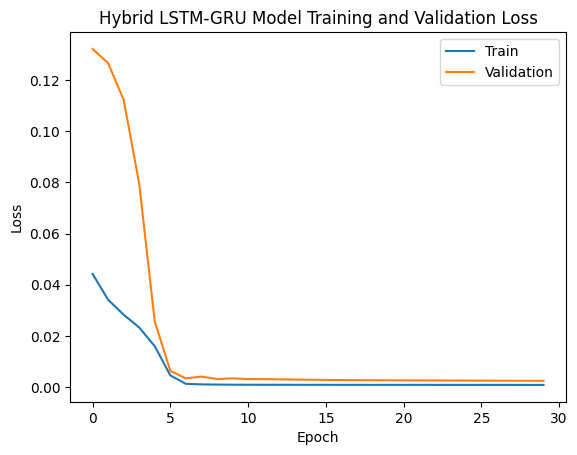

In [ ]:
# Define the hybrid GRU-LSTM model
class HybridGRULSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridGRULSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        gru_out, _ = self.gru(lstm_out[:, -1, :].unsqueeze(1))  # Taking only the last output of LSTM
        out = self.fc(gru_out[:, -1, :])
        return out

# Data preparation
# Assuming you have already split your data into X_train, y_train, X_Val, y_Val, X_test, y_test

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_val_torch = torch.tensor(X_Val, dtype=torch.float32)
y_val_torch = torch.tensor(y_Val, dtype=torch.float32)

# Model initialization
input_size = 1  # Assuming input is univariate time series
hidden_size = 64
output_size = 1
model = HybridGRULSTM(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training the model
num_epochs = 30
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    model.train()
    for i in range(0, len(X_train_torch), batch_size):
        inputs = X_train_torch[i:i+batch_size]
        targets = y_train_torch[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    train_loss = epoch_train_loss / (len(X_train_torch) / batch_size)
    train_losses.append(train_loss)

    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_torch)
        val_loss = criterion(val_outputs, y_val_torch).item()
        val_losses.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the loss
plt.plot(range(num_epochs), train_losses, label='Train')
plt.plot(range(num_epochs), val_losses, label='Validation')
plt.title('Hybrid LSTM-GRU Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Hybrid_LSTM_GRU_Model_Loss.png')
plt.show()

In [ ]:
# Get predictions for the validation set
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_torch)
hybrid_predictions_val = val_outputs.numpy()

# Inverse transform the predictions and ground truth
hybrid_predictions_val_inv = scaler.inverse_transform(hybrid_predictions_val)
y_val_inv = scaler.inverse_transform(y_Val)

# Calculate RMSE
rmse_val = np.sqrt(mean_squared_error(y_val_inv, hybrid_predictions_val_inv))
print("Validation RMSE:", rmse_val)

# Calculate MAPE
mape_val = mean_absolute_percentage_error(y_val_inv, hybrid_predictions_val_inv)
print("Validation MAPE:", mape_val)

# Calculate MSE
mse_val = mean_square_error(y_val_inv, hybrid_predictions_val_inv)
print("Validation MSE:", mse_val)

Validation RMSE: 1.6799225431273879
Validation MAPE: 1.0080259740525475
Validation MSE: 2.8221397509075903


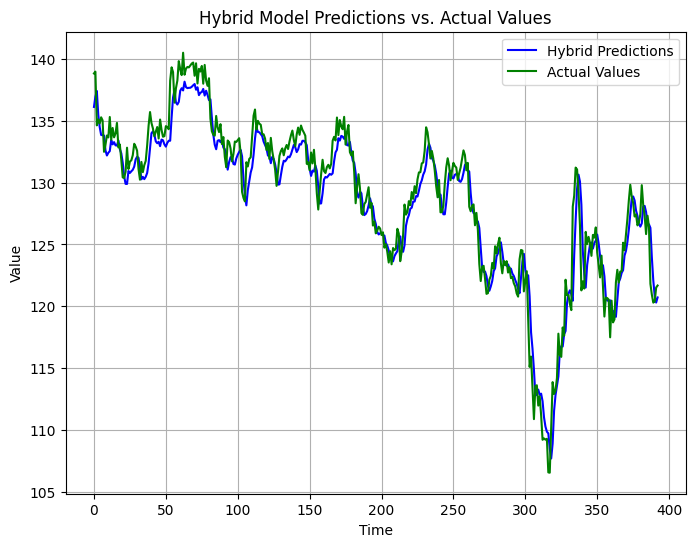

In [ ]:
x = range(len(hybrid_predictions_val))

plt.figure(figsize=(8, 6))
plt.plot(x, hybrid_predictions_val_inv, label='Hybrid Predictions', color='blue')
plt.plot(x, y_val_inv, label='Actual Values', color='green')

plt.title('Hybrid Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig('Hybrid_Model_Predictions_vs_Actual_Values.png')
plt.show()

**GRU LSTM Model Testing**

In [ ]:
# Get predictions for the testing set
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
hybrid_predictions_test = test_outputs.numpy()

# Inverse transform the predictions and ground truth
hybrid_predictions_test_inv = scaler.inverse_transform(hybrid_predictions_test)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE for testing set
rmse_test = np.sqrt(mean_squared_error(y_test_inv, hybrid_predictions_test_inv))
print("Testing RMSE:", rmse_test)

# Calculate MAPE for testing set
mape_test = mean_absolute_percentage_error(y_test_inv, hybrid_predictions_test_inv)
print("Testing MAPE:", mape_test)

# Calculate MSE for testing set
mse_test = mean_square_error(y_test_inv, hybrid_predictions_test_inv)
print("Testing MSE:", mse_test)

Testing RMSE: 1.556602901645233
Testing MAPE: 0.9813782641188217
Testing MSE: 2.4230125934103586


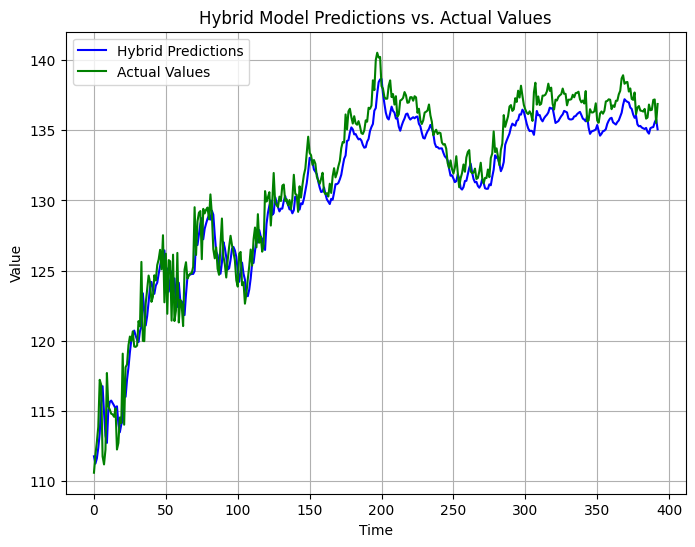

In [ ]:
x = range(len(hybrid_predictions_test))

plt.figure(figsize=(8, 6))
plt.plot(x, hybrid_predictions_test_inv, label='Hybrid Predictions', color='blue')
plt.plot(x, y_test_inv, label='Actual Values', color='green')

plt.title('Hybrid Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig('Hybrid_Model_Predictions_vs_Actual_Values.png')
plt.show()

**Hybrid GRU Model Prediction**

In [ ]:
hybrid_predictions_test_inv

array([[111.78282 ],
       [111.259895],
       [111.62509 ],
       [112.382454],
       [113.40447 ],
       [115.603714],
       [116.774796],
       [114.90563 ],
       [113.2567  ],
       [112.73728 ],
       [115.11678 ],
       [115.64913 ],
       [115.750175],
       [115.57789 ],
       [115.392914],
       [115.18469 ],
       [115.34454 ],
       [114.0936  ],
       [113.49614 ],
       [114.047874],
       [114.31502 ],
       [116.82131 ],
       [116.020744],
       [117.24202 ],
       [118.0994  ],
       [119.19674 ],
       [120.08338 ],
       [120.362274],
       [120.7356  ],
       [120.373245],
       [120.06862 ],
       [119.91857 ],
       [120.68528 ],
       [121.01039 ],
       [123.390144],
       [122.11289 ],
       [121.09605 ],
       [121.769516],
       [122.76535 ],
       [123.83946 ],
       [124.19645 ],
       [123.617256],
       [123.3479  ],
       [123.933304],
       [124.14358 ],
       [124.76995 ],
       [125.32624 ],
       [125.9

In [ ]:
import datetime
num_future_days = 14

lastest_date = pd.to_datetime(data['Date'].iat[-1])

# Generate the list of dates for forecast
next_14_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]

# Print the predicted rates for the next month
for date, price in zip(next_14_days[:14], hybrid_predictions_test_inv[-14:]):
    print(f"{date.date()}: {price}")

2024-04-16: [135.27544]
2024-04-17: [135.29858]
2024-04-18: [135.18877]
2024-04-19: [135.12878]
2024-04-20: [135.08334]
2024-04-21: [135.15984]
2024-04-22: [134.881]
2024-04-23: [134.75127]
2024-04-24: [135.14131]
2024-04-25: [135.19498]
2024-04-26: [135.2208]
2024-04-27: [135.56033]
2024-04-28: [135.7696]
2024-04-29: [135.05885]


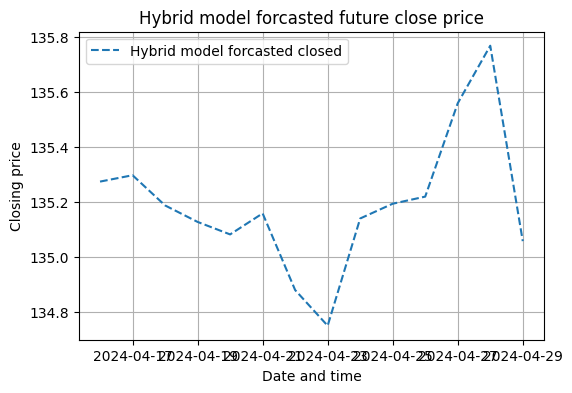

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(next_14_days[:14], hybrid_predictions_test_inv[-14:], label='Hybrid model forcasted closed', linestyle='dashed')

plt.xlabel('Date and time')
plt.ylabel('Closing price')
plt.title('Hybrid model forcasted future close price')
plt.legend()
plt.grid(True)
plt.show()

**CNN model**

**Model Fitting**

Epoch [1/20], Train Loss: 0.0152
Epoch [2/20], Train Loss: 0.0118
Epoch [3/20], Train Loss: 0.0084
Epoch [4/20], Train Loss: 0.0070
Epoch [5/20], Train Loss: 0.0061
Epoch [6/20], Train Loss: 0.0054
Epoch [7/20], Train Loss: 0.0048
Epoch [8/20], Train Loss: 0.0045
Epoch [9/20], Train Loss: 0.0043
Epoch [10/20], Train Loss: 0.0041
Epoch [11/20], Train Loss: 0.0039
Epoch [12/20], Train Loss: 0.0038
Epoch [13/20], Train Loss: 0.0037
Epoch [14/20], Train Loss: 0.0037
Epoch [15/20], Train Loss: 0.0036
Epoch [16/20], Train Loss: 0.0035
Epoch [17/20], Train Loss: 0.0034
Epoch [18/20], Train Loss: 0.0034
Epoch [19/20], Train Loss: 0.0033
Epoch [20/20], Train Loss: 0.0033


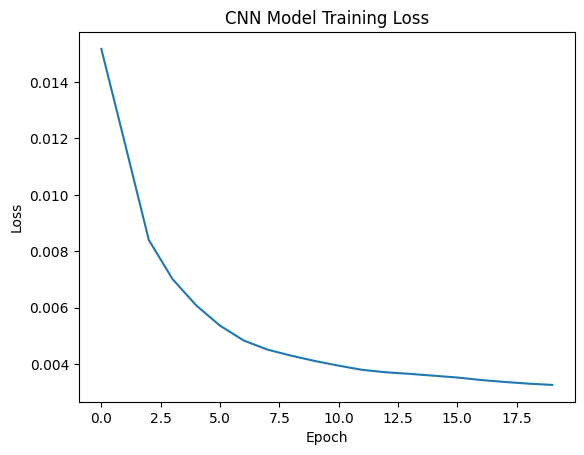

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * ((step_index - 2) // 2), 64)  # Adjust the input size based on your step_index
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_train_torch = X_train_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Training loop
num_epochs = 20
batch_size = 16
train_losses = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    for i in range(0, len(X_train_torch), batch_size):
        inputs = X_train_torch[i:i+batch_size]
        targets = y_train_torch[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets.unsqueeze(1))  # Ensure targets have the same shape as outputs
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    train_loss = epoch_train_loss / (len(X_train_torch) / batch_size)
    train_losses.append(train_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

# Plotting the loss
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), train_losses)
plt.title('CNN Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## CNN Model performance in validation set

In [ ]:
# Convert validation data to PyTorch tensors
X_val_torch = torch.tensor(X_Val, dtype=torch.float32)
y_val_torch = torch.tensor(y_Val, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_val_torch = X_val_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Get predictions for the validation set
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_torch)
cnn_predictions_val = val_outputs.numpy()

# Calculate RMSE, MSE, and MAPE for validation set
cnn_predictions_val_inv = scaler.inverse_transform(cnn_predictions_val.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_Val)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate RMSE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val_inv, cnn_predictions_val_inv))
print("Validation RMSE:", rmse_val)

# Calculate MAPE for validation set
mape_val = mean_absolute_percentage_error(y_val_inv, cnn_predictions_val_inv)
print("Validation MAPE:", mape_val)

# Calculate MSE for validation set
mse_val = mean_squared_error(y_val_inv, cnn_predictions_val_inv)
print("Validation MSE:", mse_val)

Validation RMSE: 4.088932469482846
Validation MAPE: 0.02731424640178107
Validation MSE: 16.71936873999109


## CNN MODEL PERFORMANCE USING TEST SET

In [ ]:
# Convert test data to PyTorch tensors
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_test_torch = X_test_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Get predictions for the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_torch)
cnn_predictions_test = test_outputs.numpy()

# Calculate RMSE, MSE, and MAPE for test set
cnn_predictions_test_inv = scaler.inverse_transform(cnn_predictions_test.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test_inv, cnn_predictions_test_inv))
print("Test RMSE:", rmse_test)

# Calculate MAPE for test set
mape_test = mean_absolute_percentage_error(y_test_inv, cnn_predictions_test_inv)
print("Test MAPE:", mape_test)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test_inv, cnn_predictions_test_inv)
print("Test MSE:", mse_test)


Test RMSE: 4.599589882025613
Test MAPE: 0.030569745925078926
Test MSE: 21.156227082832395


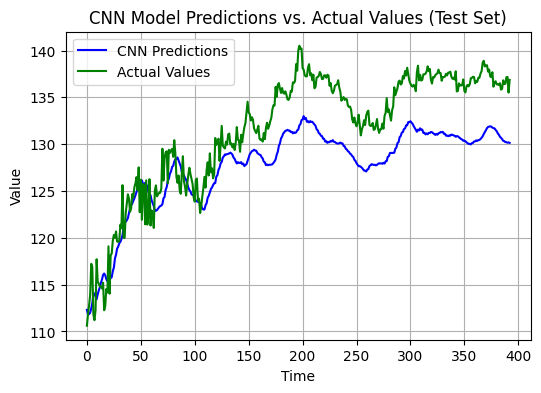

In [ ]:
# Plotting the predictions vs. actual values for the test set
x = range(len(cnn_predictions_test_inv))

plt.figure(figsize=(6, 4))
plt.plot(x, cnn_predictions_test_inv, label='CNN Predictions', color='blue')
plt.plot(x, y_test_inv, label='Actual Values', color='green')

plt.title('CNN Model Predictions vs. Actual Values (Test Set)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
cnn_predictions_test_inv

array([112.31184 , 111.80147 , 111.8526  , 111.995316, 112.45127 ,
       113.034294, 114.03903 , 114.06986 , 113.757225, 113.44399 ,
       113.96016 , 114.38862 , 114.71963 , 115.2012  , 115.55343 ,
       116.04349 , 116.186745, 116.001396, 115.58568 , 115.36056 ,
       115.33539 , 115.42037 , 115.71558 , 115.79057 , 116.44242 ,
       116.82219 , 117.79631 , 118.19169 , 118.84926 , 119.05764 ,
       119.42385 , 119.56209 , 119.86887 , 120.28194 , 121.10475 ,
       121.558876, 121.72251 , 121.8796  , 122.10863 , 122.65138 ,
       123.11043 , 123.45877 , 123.64946 , 123.95563 , 124.20002 ,
       124.550865, 124.86999 , 125.24047 , 125.46553 , 125.971085,
       125.92976 , 126.13312 , 125.77818 , 125.67371 , 125.87253 ,
       125.294075, 125.59253 , 124.92167 , 124.537575, 124.54853 ,
       124.00457 , 123.694885, 123.394714, 122.88777 , 122.88856 ,
       122.96934 , 123.12485 , 123.283195, 123.393105, 123.44398 ,
       123.59464 , 124.21715 , 124.366165, 125.11937 , 125.424

In [ ]:
import datetime
num_future_days = 14
lastest_date = pd.to_datetime(data['Date'].iat[-1])
# Generate the list of dates for forecast
next_14_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]
# Print the predicted rates for the next month
for date, price in zip(next_14_days[:14], cnn_predictions_test_inv[-14:]):
    print(f"{date.date()}: {price}")

2024-04-16: 131.52247619628906
2024-04-17: 131.38754272460938
2024-04-18: 131.15113830566406
2024-04-19: 131.01499938964844
2024-04-20: 130.79049682617188
2024-04-21: 130.6813201904297
2024-04-22: 130.5419921875
2024-04-23: 130.3619842529297
2024-04-24: 130.32647705078125
2024-04-25: 130.2226104736328
2024-04-26: 130.2117462158203
2024-04-27: 130.1526336669922
2024-04-28: 130.1877899169922
2024-04-29: 130.13978576660156


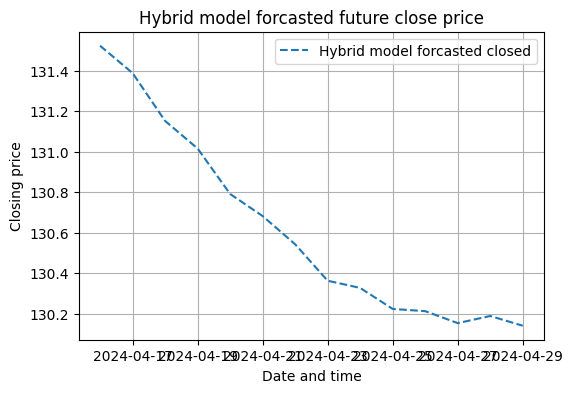

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(next_14_days[:14], cnn_predictions_test_inv[-14:], label='Hybrid model forcasted closed', linestyle='dashed')

plt.xlabel('Date and time')
plt.ylabel('Closing price')
plt.title('Hybrid model forcasted future close price')
plt.legend()
plt.grid(True)
plt.savefig('EUROINR forecasting')
plt.show()